In [1]:
import json
import random
import numpy as np
import tensorflow as tf
from collections import deque
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras import backend as K
import convert_event_list as convert
import datetime
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import time
import math

from matplotlib.colors import LinearSegmentedColormap
import colorsys
import numpy as np
    
from data_retrieval_3ksol import INSTANCEProvider
from kbh_yard_b2b import KBH_Env                               #This is the environment of the shunting yard
from dqn_kbh_colfax_b2b_instances_test_agent import DQNAgent

Using TensorFlow backend.


In [2]:
#1521138212 is our best agent. let's dive into that. 
model_nr = '1521138212'
filename = 'data_'+model_nr+'_paper.csv'
data = pd.read_csv(filename)
data.head()

,Unnamed: 0,action,instance_id,step,type,strtype
0,0,8,5000,0,['14'],['14']
1,1,2,5000,1,['16'],['16']
2,2,7,5000,2,['24'],['24']
3,3,7,5000,3,"['24', '24']","['24', '24']"
4,4,5,5000,4,"['24', '24']","['24', '24']"


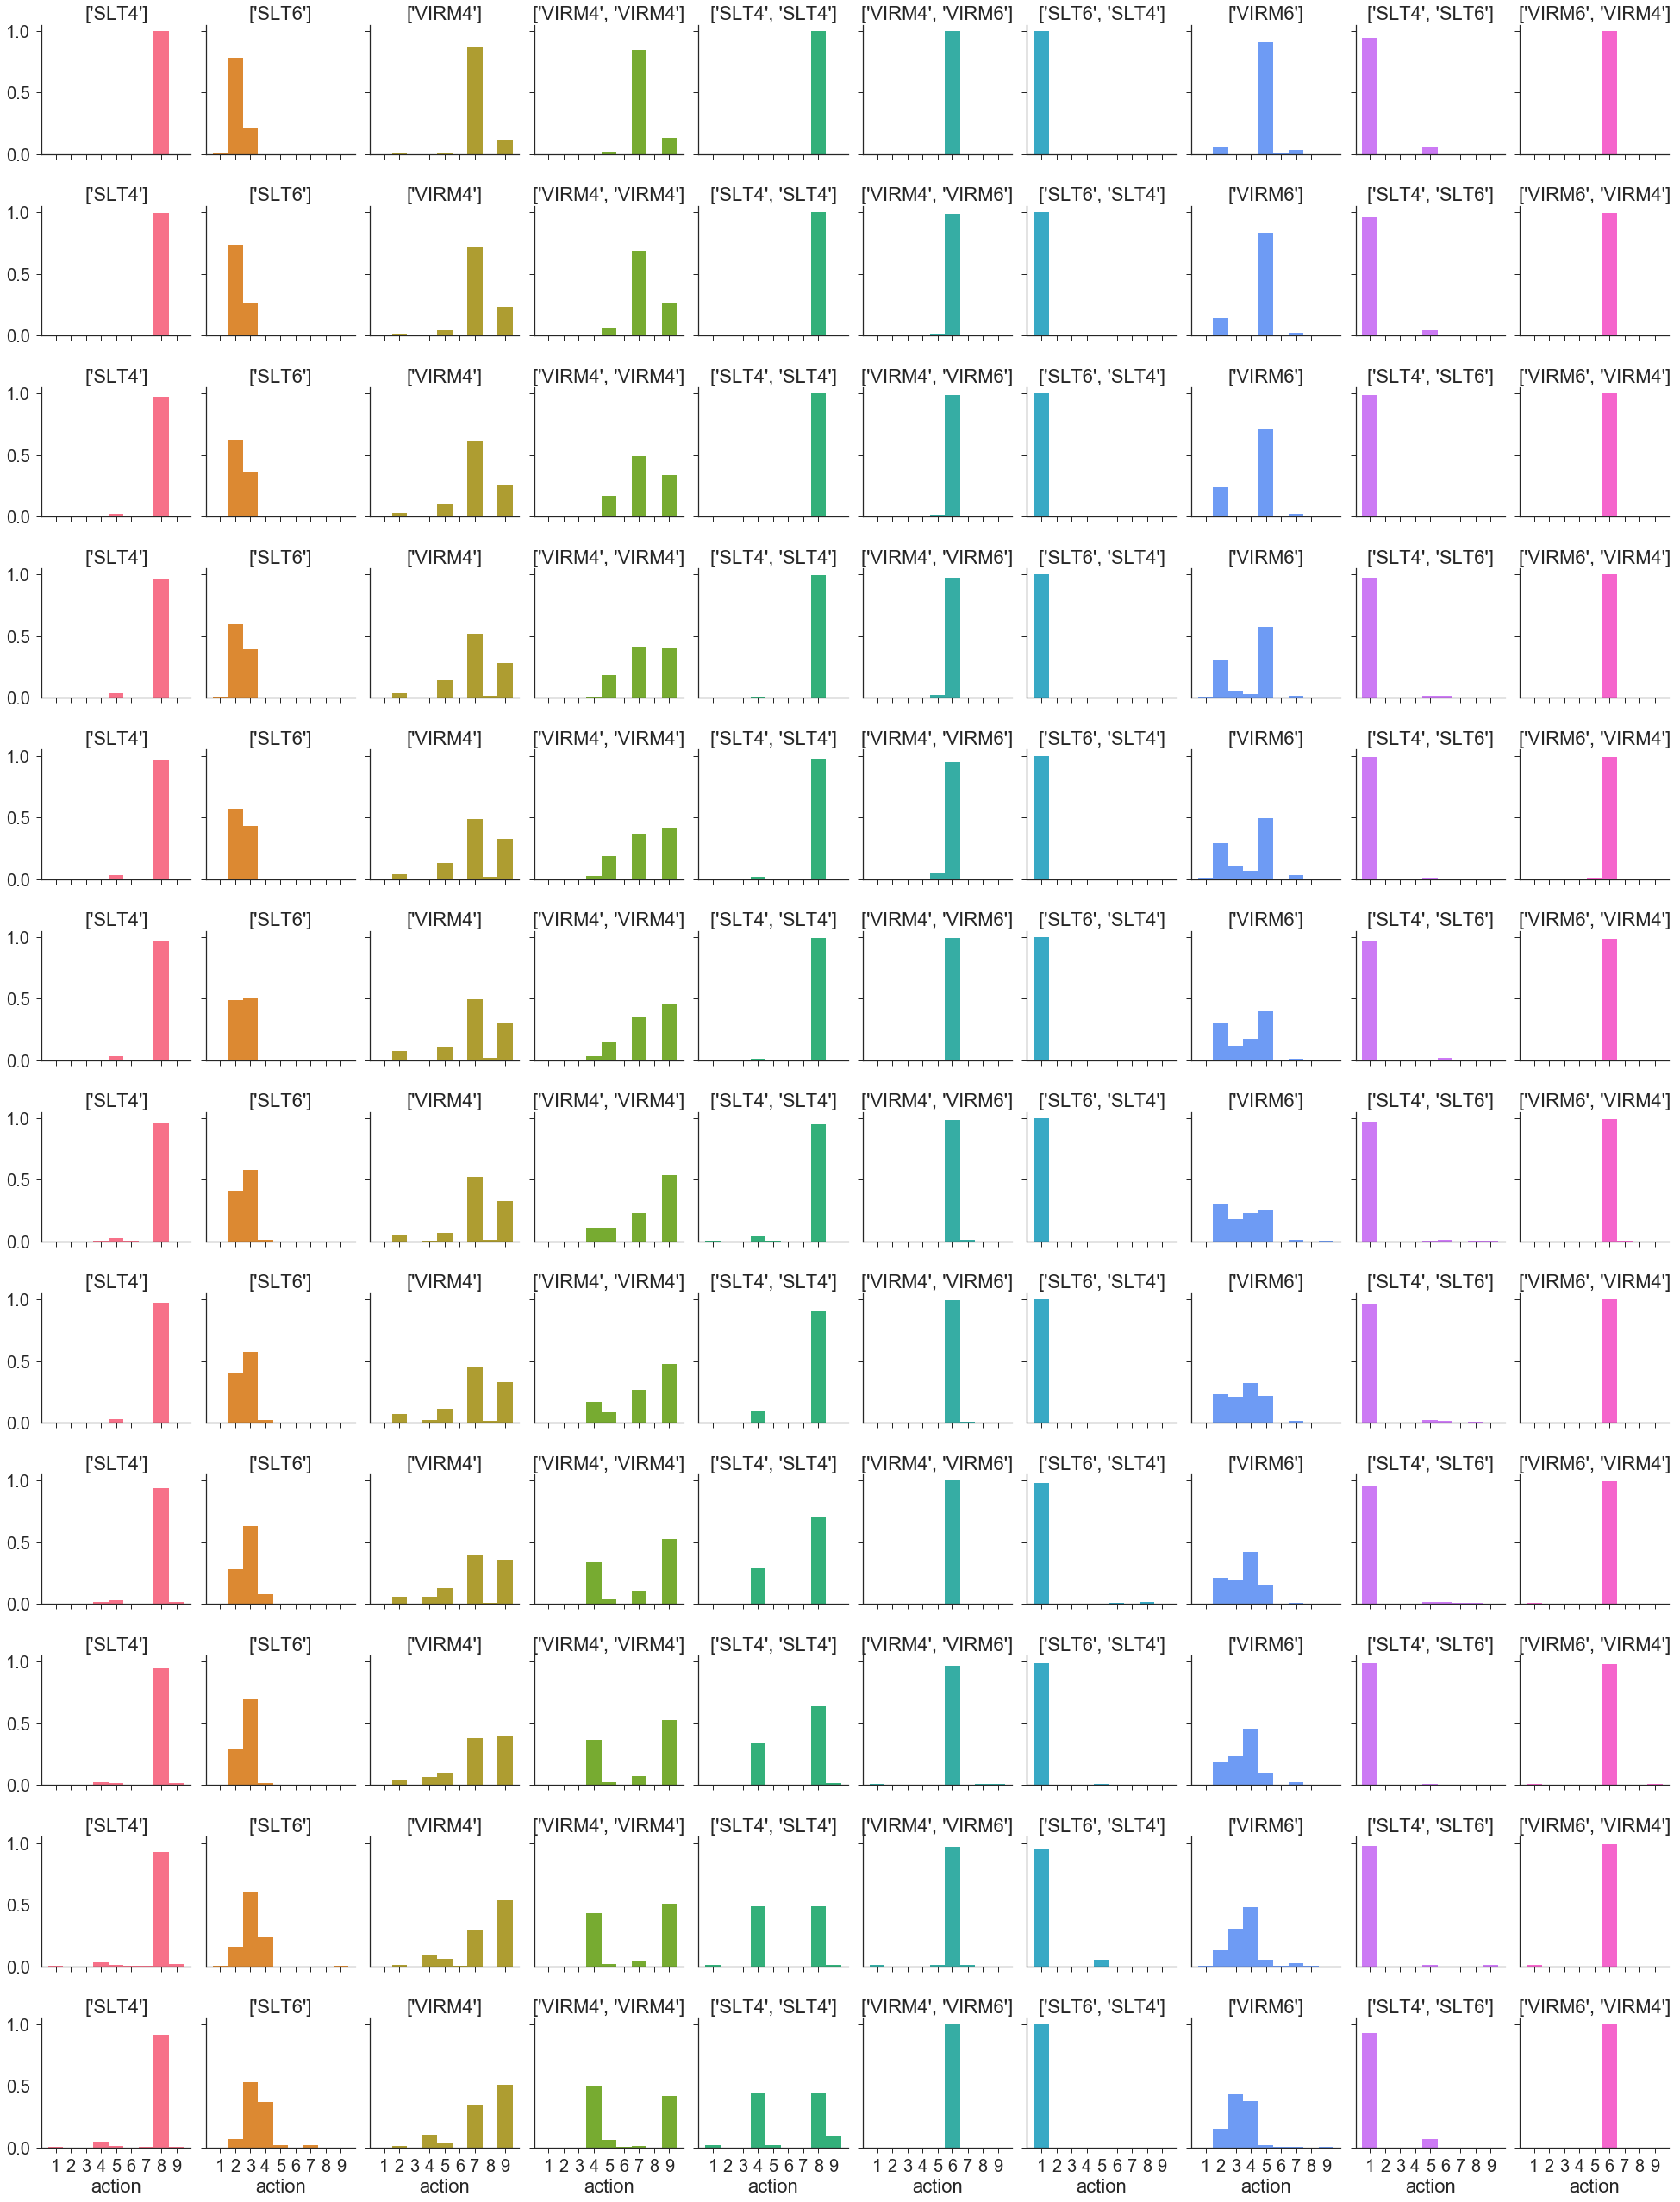

In [3]:
import seaborn as sns; sns.set(style="ticks", color_codes=True, font_scale=2)
data_select = data.loc[data.step < 45].copy()

#introduce readable strtypes
data_select['composition'] = data_select.apply(lambda row: row.strtype.replace('14','SLT4').replace('16', 'SLT6').replace('24','VIRM4').replace('26','VIRM6'), axis =1 )

g = sns.FacetGrid(data_select, col="composition", row = "step", hue='composition', margin_titles=False) #col_wrap=5, 
bins = [1,2,3,4,5,6,7,8,9,10]
# this means bins are [1,2), last bin is, according to documentation, [9,10] but there is no 10 so effectively [9,10)
g = g.map(plt.hist, "action", bins = bins, normed=1, align = 'left').set(xticks=[1,2,3,4,5,6,7,8,9]).set_titles("{col_name}").fig.subplots_adjust(wspace=.1, hspace=.4)
sns.plt.savefig('6stepstrategy.eps')